# Data Analysis - Lab 5
### M. Sébastien MASCHA & M. Pierre SAUVAGE
### ISEP Paris   |   2019-2020
<br/>
<br/>

___

# Titanic Dataset
Titanic was a British passenger liner that sank in 1912 after colliding with an iceberg. 
Only 31% of passengers survived in this disaster. The goal of this project is to complete the analysis of what sorts of people were likely to survive.

### Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- SciPy : a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

In [1]:
# coding: utf-8

import data

# data analysis
from math import sqrt,pi,exp
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<br/>
<br/>

___
# 1 - Preliminary analysis
## Discover the  "titanic_train.csv" and "titanic_test.csv"
#### Why using 2 files : train and test ? Are they identical ?
We have to different files because the purpose of the larger one, the titanic_train.csv is to build our predictive model.  The next one, the titanic_test.csv, is to see how well our model performs on unseen data : Naive Bayes Prediction & Decision trees Prediction. 

These two files have same features and structure. The type and quality of the data is similar. Nethertheless, for the test set, the ground truth for each passenger is not provided. We'll need to predict them based on our model built with train set. Therefore, we will be able to compute our model performance.


In [2]:
titanic_train_df = pd.read_csv("data/titanic_train.csv", sep =',')
titanic_test_df = pd.read_csv("data/titanic_test.csv", sep =',')

titanic_combine_df = [titanic_train_df, titanic_test_df]

print("Train dataset")
titanic_train_df.info()

Train dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 13 columns):
PassengerId    593 non-null int64
Survived       593 non-null int64
Pclass         593 non-null int64
Name           593 non-null object
FullName       593 non-null object
Sex            593 non-null object
Age            473 non-null float64
SibSp          593 non-null int64
Parch          593 non-null int64
Ticket         593 non-null object
Fare           593 non-null float64
Cabin          143 non-null object
Embarked       592 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 60.4+ KB


In [3]:
print("Test dataset :")
titanic_test_df.info()

Test dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 13 columns):
PassengerId    298 non-null int64
Survived       298 non-null int64
Pclass         298 non-null int64
Name           298 non-null object
FullName       298 non-null object
Sex            298 non-null object
Age            241 non-null float64
SibSp          298 non-null int64
Parch          298 non-null int64
Ticket         298 non-null object
Fare           298 non-null float64
Cabin          61 non-null object
Embarked       297 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 30.4+ KB


 #### Types of the attributes of the dataset
- We have 5 integers, 2 floats ; continous: Age, Fare. Discrete: SibSp, Parch.

- Five features are strings (object), categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

- Survived is a categorical feature. This is a binary classification problem.

Below are short descriptions for not-explicit features :

- pclass:    Ticket class     
- sibsp:    number of siblings / spouses aboard
- parch:    number of parents / children aboard       
- embarked:    Port of Embarkation

## Preprocessing
### Missing Values 
Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.


In [4]:
def find_missing_values(dataframe):
    Total = dataframe.isnull().sum().sort_values(ascending = False)
    Percentage = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending = False)
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

print(find_missing_values(pd.concat([titanic_train_df, titanic_test_df])))

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
Fare             0  0.000000
Ticket           0  0.000000
Parch            0  0.000000
SibSp            0  0.000000
Sex              0  0.000000
FullName         0  0.000000
Name             0  0.000000
Pclass           0  0.000000
Survived         0  0.000000
PassengerId      0  0.000000


We have the Cabin with the highest rate of missing values, we might have to drop  it. For embarked we only  have two missing value, it will  be easy  to fix it. But in the other hand, the attributes Age, we will  have to handle the missing value (20% of the total of Age values) because it could be important to predict the survival  of the passenger.

### Handle missing values in Age feature
We decide to handle Age's missing values feature as it is definitely correlated to survival. 

The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation.

We will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

That way we can have values close enough to our actual dataset.

In [5]:
for dataset in titanic_combine_df:
    print(dataset["Age"].isnull().sum())
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice

    print(dataset["Age"].isnull().sum())



120
0
57
0


### Display histogram of people on board

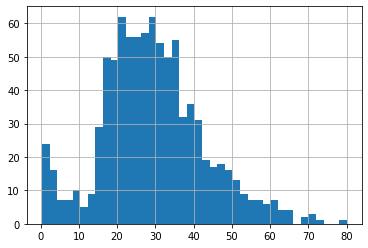

In [6]:
pd.concat([titanic_train_df, titanic_test_df]).Age.hist(bins=40)

We display  here the histogram  of the age of the passenger of the Titanic from  1 to 80, with the bins of 40 meaning that age will displayed 2 years by 2 years.

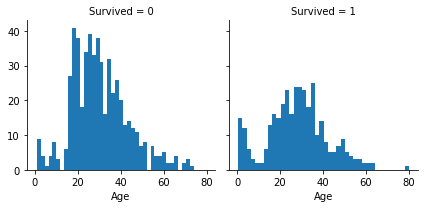

In [7]:
g = sns.FacetGrid(pd.concat([titanic_train_df, titanic_test_df]), col='Survived')
g.map(plt.hist, 'Age', bins=40)

You can see that people have a high probability of survival when they are between 15 and 40 years old.

#### Percentage of People in each class

3    491
1    216
2    184
Name: Pclass, dtype: int64


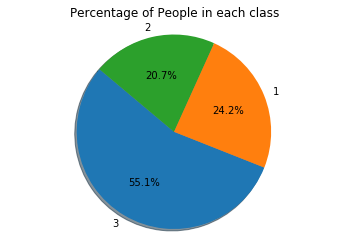

In [8]:
labels = '3', '1', '2'
print(pd.concat([titanic_train_df, titanic_test_df]).Pclass.value_counts())
sizes = pd.concat([titanic_train_df, titanic_test_df]).Pclass.value_counts().values

# Plot
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of People in each class')
plt.axis('equal')
plt.show()

### Percentage of survivors for men and women

1    233
0     81
Name: Survived, dtype: int64
0    468
1    109
Name: Survived, dtype: int64


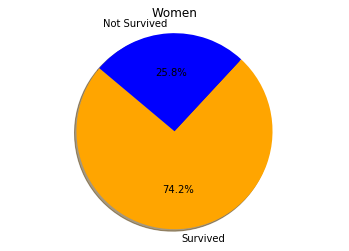

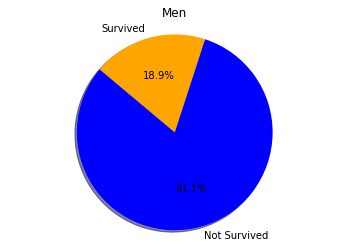

In [9]:
women = pd.concat([titanic_train_df, titanic_test_df])[pd.concat([titanic_train_df, titanic_test_df])['Sex']=='female']
men = pd.concat([titanic_train_df, titanic_test_df])[pd.concat([titanic_train_df, titanic_test_df])['Sex']=='male']
w_survived = women.Survived.value_counts()
m_survived = men.Survived.value_counts()

colors_w = ['orange', 'blue']
colors_m = ['blue', 'orange']
print (w_survived)
print (m_survived)
labels_W =  'Survived', 'Not Survived'
sizes_W = women.Survived.value_counts().values

plt.pie(sizes_W, labels=labels_W, colors = colors_w,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Women')
plt.axis('equal')
plt.show()

labels_M =   'Not Survived', 'Survived'
sizes_M = men.Survived.value_counts().values

plt.pie(sizes_M, labels=labels_M,colors = colors_m,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Men')
plt.axis('equal')
plt.show()



You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.
Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

### What is the percentage of survivors for children and adults ?

In [10]:
for dataset in titanic_combine_df:
    dataset['Child'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 18, 'Child'] = 1
    dataset.loc[ dataset['Age'] > 18, 'Child'] = 0

0    82
1    75
Name: Survived, dtype: int64


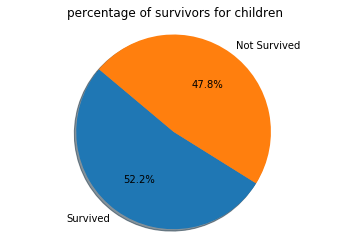

In [11]:
labels =  'Survived', 'Not Survived'

# for the children
survivorsChildren = pd.concat([titanic_train_df, titanic_test_df]).loc[pd.concat([titanic_train_df, titanic_test_df])['Child'] == 1].Survived.value_counts()
print(survivorsChildren)

plt.pie(survivorsChildren, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('percentage of survivors for children')
plt.show()

0    467
1    267
Name: Survived, dtype: int64


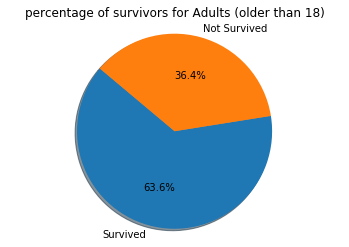

In [12]:
# for the adults 

survivorsAdults = pd.concat([titanic_train_df, titanic_test_df]).loc[pd.concat([titanic_train_df, titanic_test_df])['Child'] == 0].Survived.value_counts()
print(survivorsAdults)
plt.pie(survivorsAdults, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('percentage of survivors for Adults (older than 18)')
plt.show()

### Display the survival rates for all possible combinations adult/children, men/women.

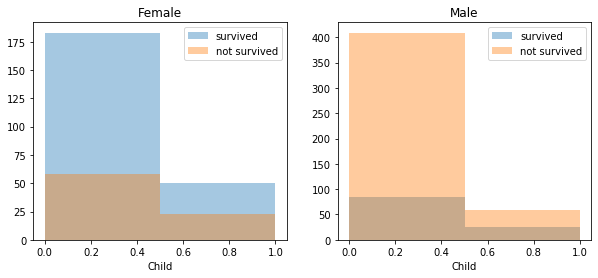

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = pd.concat([titanic_train_df, titanic_test_df])[pd.concat([titanic_train_df, titanic_test_df])['Sex']=='female']
men = pd.concat([titanic_train_df, titanic_test_df])[pd.concat([titanic_train_df, titanic_test_df])['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Child, label = survived, bins=2, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Child, label = not_survived, ax = axes[0], bins=2, kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Child, label = survived, ax = axes[1], bins=2, kde = False)
ax = sns.distplot(men[men['Survived']==0].Child, label = not_survived, ax = axes[1], bins=2, kde = False)
ax.legend()
_ = ax.set_title('Male')

### Display the survival rates in 1st, 2nd and 3rd class. Once again, explain how you handled missing data.

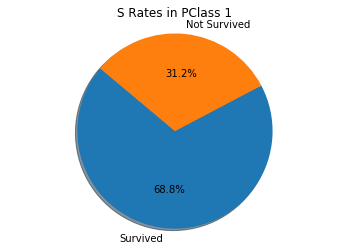

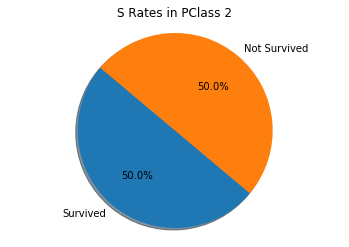

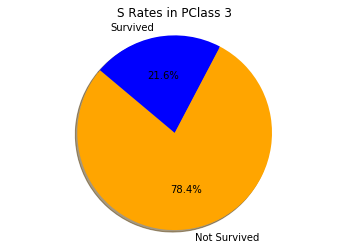

In [14]:
#FacetGrid = sns.FacetGrid(titanic_train_df, row='Embarked', height=4.5, aspect=1.6)
#FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
#FacetGrid.add_legend()

# Pclass = 1
sizes_1 = titanic_train_df.loc[titanic_train_df['Pclass'] == 1].Survived.value_counts().values
total_1 = sizes_1[0]+sizes_1[1]
srates_1 = [sizes_1[0]/total_1, sizes_1[1]/total_1] 
labels_1 =  'Survived', 'Not Survived'

plt.pie(srates_1, labels=labels_1,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in PClass 1')
plt.show()

# Pclass = 2 

sizes_2 = titanic_train_df.loc[titanic_train_df['Pclass'] == 2].Survived.value_counts().values
#print(titanic_train_df.loc[titanic_train_df['Pclass'] == 2].Survived.value_counts())
total_2 = sizes_2[0]+sizes_2[1]
srates_2 = [sizes_2[0]/total_2, sizes_2[1]/total_2] 
labels_2 =  'Survived', 'Not Survived'

plt.pie(srates_2, labels=labels_2,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in PClass 2')

plt.show()

# Pclass = 3 

sizes_3 = titanic_train_df.loc[titanic_train_df['Pclass'] == 3].Survived.value_counts().values
#print(titanic_train_df.loc[titanic_train_df['Pclass'] == 3].Survived.value_counts())
total_3 = sizes_3[0]+sizes_3[1]
srates_3 = [sizes_3[0]/total_3, sizes_3[1]/total_3] 
labels_3 =  'Not Survived', 'Survived'
colors_3 =  ['orange', 'blue']

plt.pie(srates_3, labels=labels_3, colors = colors_3,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in PClass 3')

plt.show()


## Question 3 - Based on your previous answers, what can you say about the policy "women and children first" on board the Titanic ?
“Women and children first” policy have definitly an impact on the survival rate.

Sex, class, age  of the person have a huge impact on the survival rate. 

Children's survival rate is almost two times higher than adult.

## Question 4 - Display a correlation matrix of all the attributes and comment on any interesting thing that may show up.

In [15]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,299,1,1,Saalfeld,Mr. Adolphe,male,25.0,0,0,19988,30.5000,C106,S,0
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,25.0,0,0,9234,7.7500,NaN,Q,0
3,302,1,3,McCoy,Mr. Bernard,male,29.0,2,0,367226,23.2500,NaN,Q,0
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.0,0,0,LINE,0.0000,NaN,S,0


In [ ]:

titanic_train_df = titanic_train_df.drop(columns =['PassengerId', 'Name', 'FullName', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_train_df.Sex[titanic_train_df.Sex == 'male'] = 1
titanic_train_df.Sex[titanic_train_df.Sex == 'female'] = 2  


titanic_test_df = titanic_test_df.drop(columns =['PassengerId', 'Name', 'FullName', 'Ticket', 'Cabin', 'Embarked'], axis=1)

titanic_test_df.Sex[titanic_test_df.Sex == 'male'] = 1
titanic_test_df.Sex[titanic_test_df.Sex == 'female'] = 2  


In [ ]:
titanic_test_df = titanic_test_df.drop(columns =['PassengerId', 'Name', 'FullName', 'Ticket', 'Cabin', 'Embarked'], axis=1)

titanic_test_df.Sex[titanic_test_df.Sex == 'male'] = 1
titanic_test_df.Sex[titanic_test_df.Sex == 'female'] = 2 

In [21]:
titanic_test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,2,38.0,1,0,71.2833,0
2,1,3,2,26.0,0,0,7.9250,0
3,1,1,2,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### CORRELATION MATRIX 

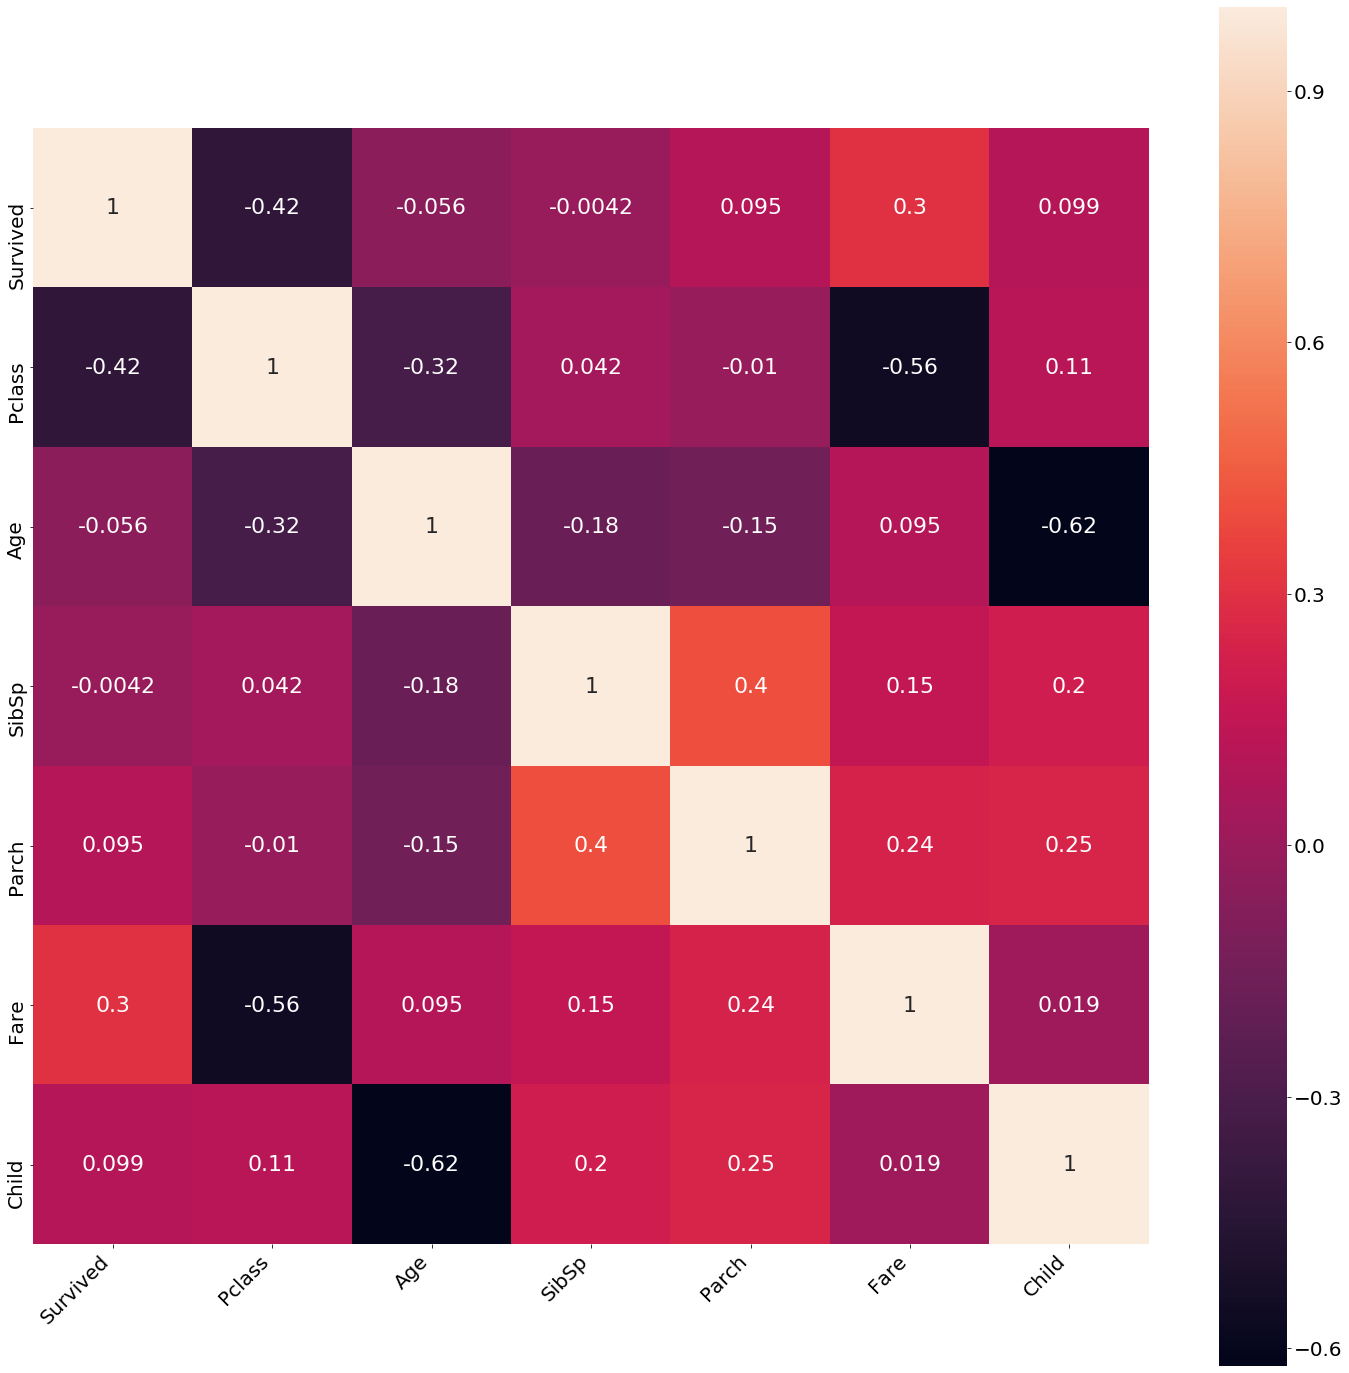

In [22]:
corr = titanic_train_df.corr()
plt.figure(2,figsize=(25,25))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
ax = sns.heatmap(
    corr, annot = True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Question 5 - Influence of the ticket price on survival chances
In both training and test sets, create a "Fare2" attribute whose value is 1 if the ticket price was below 10, 2 below 20, 3 below 30 and 4 otherwise. Using the right tools, determine the strength of the connection between your new "Fare2" attribute and the class the passengers traveled into. Then display the survival rates for each value of "Fare2".
#### Group by fare :

In [26]:
for dataset in [titanic_train_df, titanic_test_df]:
    dataset['Fare2'] = titanic_train_df['Fare'].astype(int)
    dataset.loc[ dataset['Fare2'] <= 10, 'Fare2'] = 1
    dataset.loc[ (dataset['Fare2'] > 10) & (dataset['Fare2'] <= 20), 'Fare2'] = 2
    dataset.loc[ (dataset['Fare2'] > 20) & (dataset['Fare2'] <= 30), 'Fare2'] = 3
    dataset.loc[ dataset['Fare2'] > 30, 'Fare2'] = 4

titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Fare2
0,1,1,1,25.0,0,0,30.5000,0,3
1,1,1,2,50.0,0,1,247.5208,0,4
2,1,3,2,25.0,0,0,7.7500,0,1
3,1,3,1,29.0,2,0,23.2500,0,3
4,0,3,1,19.0,0,0,0.0000,0,1


#### Connection between Fare2 and the class

In [32]:
print(titanic_train_df['Pclass'].unique())
print(titanic_train_df['Fare2'].unique())

print("The connexion factor can be seen as the correlation factor above :")
print(titanic_train_df['Pclass'].corr(titanic_train_df['Fare2']))
print("")

[1 3 2]
[3 4 1 2]
The connexion factor can be seen as the correlation factor above :
-0.7246979388565348


#### Display the survival rates for each value of "Fare2"

0    195
1     43
Name: Survived, dtype: int64


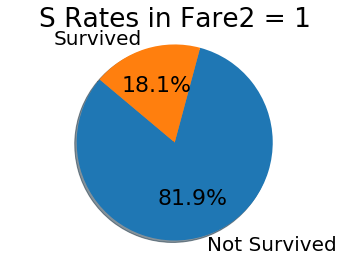

0    57
1    47
Name: Survived, dtype: int64


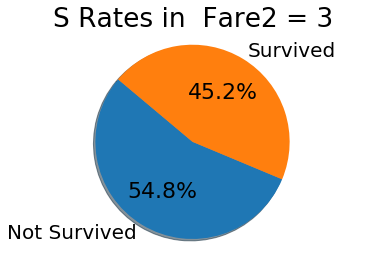

0    50
1    47
Name: Survived, dtype: int64


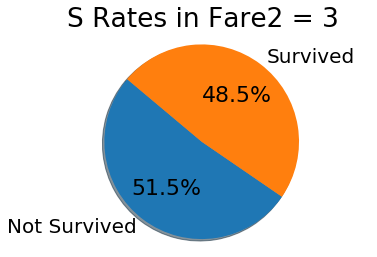

1    99
0    55
Name: Survived, dtype: int64


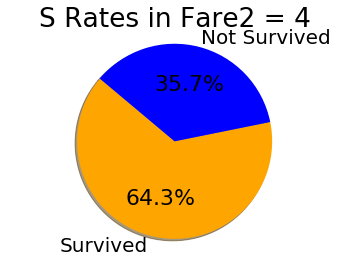

In [34]:
# Fare1 = 1
sizes_1 = titanic_train_df.loc[titanic_train_df['Fare2'] == 1].Survived.value_counts().values
print(titanic_train_df.loc[titanic_train_df['Fare2'] == 1].Survived.value_counts())
total_1 = sizes_1[0]+sizes_1[1]
srates_1 = [sizes_1[0]/total_1, sizes_1[1]/total_1] 
labels_1 =   'Not Survived', 'Survived'

plt.pie(srates_1, labels=labels_1,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in Fare2 = 1')
plt.show()

# Fare2 = 2 

sizes_2 = titanic_train_df.loc[titanic_train_df['Fare2'] == 2].Survived.value_counts().values
print(titanic_train_df.loc[titanic_train_df['Fare2'] == 2].Survived.value_counts())
total_2 = sizes_2[0]+sizes_2[1]
srates_2 = [sizes_2[0]/total_2, sizes_2[1]/total_2] 
labels_2 =   'Not Survived', 'Survived'

plt.pie(srates_2, labels=labels_2,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in  Fare2 = 3')

plt.show()

# Fare2 = 3 

sizes_3 = titanic_train_df.loc[titanic_train_df['Fare2'] == 3].Survived.value_counts().values
print(titanic_train_df.loc[titanic_train_df['Fare2'] == 3].Survived.value_counts())
total_3 = sizes_3[0]+sizes_3[1]
srates_3 = [sizes_3[0]/total_3, sizes_3[1]/total_3] 
labels_3 =   'Not Survived','Survived'
#colors_3 =  ['orange', 'blue']

plt.pie(srates_3, labels=labels_3, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in Fare2 = 3')

plt.show()

#Fare2 = 4

sizes_4 = titanic_train_df.loc[titanic_train_df['Fare2'] == 4].Survived.value_counts().values
print(titanic_train_df.loc[titanic_train_df['Fare2'] == 4].Survived.value_counts())
total_4 = sizes_4[0]+sizes_3[1]
srates_4 = [sizes_4[0]/total_4, sizes_4[1]/total_4] 
labels_4 =  'Survived', 'Not Survived'
colors_4 =  ['orange', 'blue']

plt.pie(srates_4, labels=labels_4,colors = colors_4,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('S Rates in Fare2 = 4')

plt.show()

# Naive Bayes Prediction
We decide to handle Age's missing values feature as it is definitely correlated to survival. 

The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation.

We will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

That way we can have values close enough to our actual dataset.

In [35]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Child,Fare2
0,1,1,1,25.0,0,0,30.5000,0,3
1,1,1,2,50.0,0,1,247.5208,0,4
2,1,3,2,25.0,0,0,7.7500,0,1
3,1,3,1,29.0,2,0,23.2500,0,3
4,0,3,1,19.0,0,0,0.0000,0,1


## Use the Naive Bayes classifier 
Predict survival rates using the sex of the
passengers and whether or not they were adults

In [55]:
#needed imports
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

#classifier choice
gnbModel = GaussianNB()
#choice of the training set, considered attributes and variables to predict
gnbModel.fit(titanic_train_df[['Child', 'Fare2']], titanic_train_df['Survived'])

expected = titanic_train_df['Survived']
predicted = gnbModel.predict(titanic_train_df[['Child', 'Fare2']])
print(metrics.classification_report(expected, predicted))

expected = titanic_test_df['Survived']
predicted = gnbModel.predict(titanic_test_df[['Child', 'Fare2']])
print(metrics.classification_report(expected, predicted))

# acc_gaussian = round(gnbModel.score(titanic_train_df[['Child', 'Fare2']], titanic_train_df['Survived']) * 100, 2)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       357
           1       0.63      0.53      0.57       236

    accuracy                           0.69       593
   macro avg       0.68      0.66      0.67       593
weighted avg       0.68      0.69      0.68       593

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       192
           1       0.38      0.36      0.37       106

    accuracy                           0.56       298
   macro avg       0.52      0.52      0.52       298
weighted avg       0.56      0.56      0.56       298



We are in a binary classifiers problem : Survival or not

Let us consider the following notations:
- TP: True positive (data classified True and that are really in this class)
- FP: False positive (data classified True but are not)
- TN: True negative (data classified False and are really in this class) 
- FN: False negative (data classified False but are actually True)

Naive Bayes is not very good for this data set : 0.69. The prediction was quite accurate with only Child and fare features.
### Sex, Child or not, Fare 

In [57]:
#classifier choice
gnbModel = GaussianNB()
#choice of the training set, considered attributes and variables to predict
gnbModel.fit(titanic_train_df[['Sex', 'Child', 'Fare2']], titanic_train_df['Survived'])

expected = titanic_train_df['Survived']
predicted = gnbModel.predict(titanic_train_df[['Sex', 'Child', 'Fare2']])
print(metrics.classification_report(expected, predicted))

expected = titanic_test_df['Survived']
predicted = gnbModel.predict(titanic_test_df[['Sex','Child', 'Fare2']])
print(metrics.classification_report(expected, predicted))

# acc_gaussian = round(gnbModel.score(titanic_train_df[['Child', 'Fare2']], titanic_train_df['Survived']) * 100, 2)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       357
           1       0.74      0.69      0.71       236

    accuracy                           0.78       593
   macro avg       0.77      0.76      0.77       593
weighted avg       0.78      0.78      0.78       593

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       192
           1       0.68      0.71      0.69       106

    accuracy                           0.78       298
   macro avg       0.75      0.76      0.76       298
weighted avg       0.78      0.78      0.78       298



Now the accuracy of our modele is : 0.78. 

Sex is definitly a good feature to exploit. It increase the accuracy of the modele factor by ten points. 

### Decision trees Prediction

In [ ]:
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
import pydot

clf=tree.DecisionTreeClassifier()
clf=clf.fit(titanic_train_df[["Sex", "Age", "Fare", "Pclass", "Child", "Parch", "SibSp"]],titanic_train_df['Survived'])
#Sex_catstandsfortransformedcategoricalarray
data_feature_names=["Sex", "Age", "Fare", "Pclass", "Child", "Parch", "SibSp"]
dot_data=tree.export_graphviz(clf,out_file=None,
                            feature_names =data_feature_names,class_names =True,
                            filled=True,rounded =True,precision=0)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())   
Image(graph.write_png ('./filename.png'))


With the Pclass, Fare2, Child and Sex features. 

Nodes seam clean, the Gini ratios in our tree are all equal to 0.


Thanks to decision tree, it brings a global view of the people who survived the titanic sanking (in blue, with all their respective features) and the people who died (in orange). 

With less features it is easy to understand.

If we add several attributes, we get a bushy tree deeper and complex.